# How good does your chocolate taste? / Everything about the chocolate?

## Introduction

In this project, we do EDA

we will use a number of different supervised algorithms to precisely predict chocolate rating using data in the Chocolate Bar Ratings dataset.

From the origins of cocoa with the Mayans, to the introduction of chocolate powder by the Spanish into Europe and to the modern day chocolate bars. Chocolate is the world's most loved dessert for kids and adults. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal!

Some data about the consumption of chocolate

## Questions

1. What is the main factor that decides the quality of chocolate?
2. Which company makes the most chocolate?
3. Which country makes the most chocolate?
4. What is the most common cocoa percentage?
5. Single origin vs. blend? Which one is better?
6. Given data of a bar predict chocolate rating

## Data

The chocolate bar ratings dataset contains expert ratings of over 1700 chocolate bars.

Company(Maker if known): Name of the company manufacturing the bar.

Specific Bean Origin\nor Bar Name: The specific geo-region of origin for the bar.

REF: A value linked to when the review was entered in the database. Higher = more recent.

Review\nDate: Date of publication of the review.

Cocoa\nPercent: Cocoa percentage (darkness) of the chocolate bar being reviewed.

Company\nLocation: Manufacturer base country.

Rating: Expert rating for the bar.

Bean\nType: The variety (breed) of bean used, if provided.

Broad Bean\nOrigin: The broad geo-region of origin for the bean.

## Exploratory Data Analysis (EDA)

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
import os

In [413]:
df = pd.read_csv('flavors_of_cacao.csv')

In [414]:
df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [39]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [40]:
# check null, only 2 nulls in bean type and bean origin
df.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [41]:
df[df['Bean\nType'].isnull()]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


In [42]:
df[df['Broad Bean\nOrigin'].isnull()]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1072,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN


In [415]:
# change column names for easy operations
df.columns = ['Company', 'Bar_Origin',
       'REF', 'Review_Date', 'Cocoa_Percent', 'Company_Location', 'Rating',
       'Bean_Type', 'Bean_Origin']

In [44]:
df.head()

,Company,Bar_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [416]:
df['Company'] = df['Company'].astype('category')
df['Cocoa_Percent'] = df['Cocoa_Percent'].str.replace('%','')
df['Cocoa_Percent'] = df['Cocoa_Percent'].astype('float')

In [417]:
# replace nan with \xa0 because \xa0 is used in the original data
# will do something to missing values later
df['Bean_Type'].fillna('\xa0',inplace=True)
df['Bean_Origin'].fillna('\xa0',inplace=True)

In [240]:
df[df['Rating']>3.8].sort_values(by=['Rating'],ascending=False).head()

,Company,Bar_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin
78,Amedei,Chuao,111,2007,70.0,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,70.0,Italy,5.0,Blend,
9,A. Morin,Pablino,1319,2014,70.0,France,4.0,,Peru
1244,Pacari,Tangara,1415,2014,70.0,Ecuador,4.0,,Ecuador
1330,Pralus,Jamaique,32,2006,75.0,France,4.0,Trinitario,Jamaica


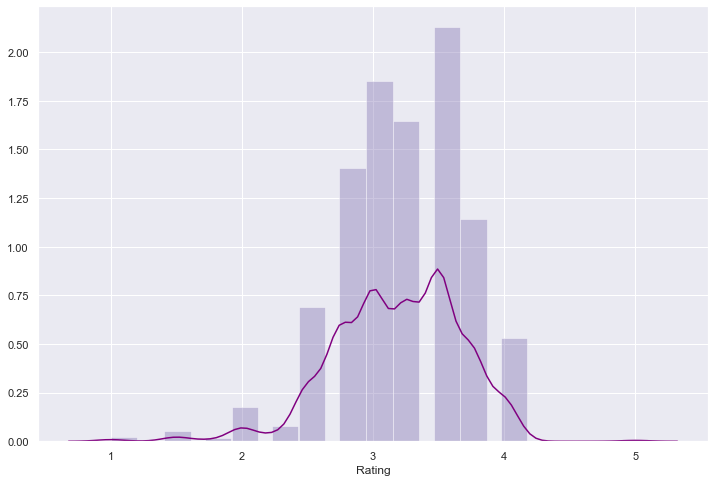

In [313]:
# rating distrubution
plt.figure(figsize=(12,8))
sns.distplot(df['Rating'],kde_kws={"color":"purple"}, hist_kws={"width":0.2, "color":"m"})

In [337]:
# Most ratings arebetween 3 to 3.75. 
colors = ['#7FA6EE']
group_labels = ['Rating Distplot']
fig = ff.create_distplot([df['Rating']],group_labels,bin_size=.2, colors=colors)
fig.show()

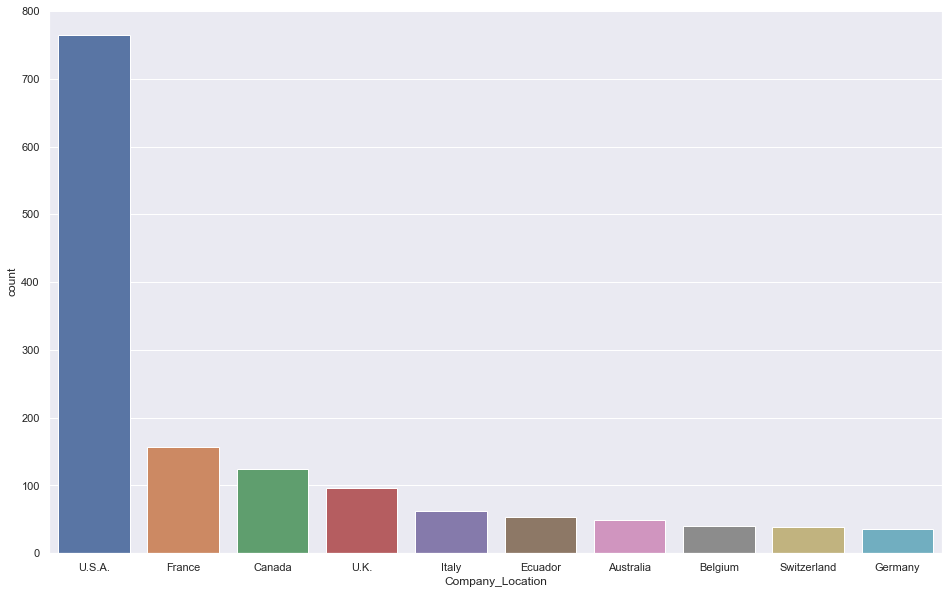

In [352]:
# top 10 countries make the most chocolate
# us makes the most chocolates way surpass the second positioned country France
plt.figure(figsize=(16,10))
sns.countplot(x='Company_Location',data=df,order=df['Company_Location'].value_counts().iloc[:10].index)

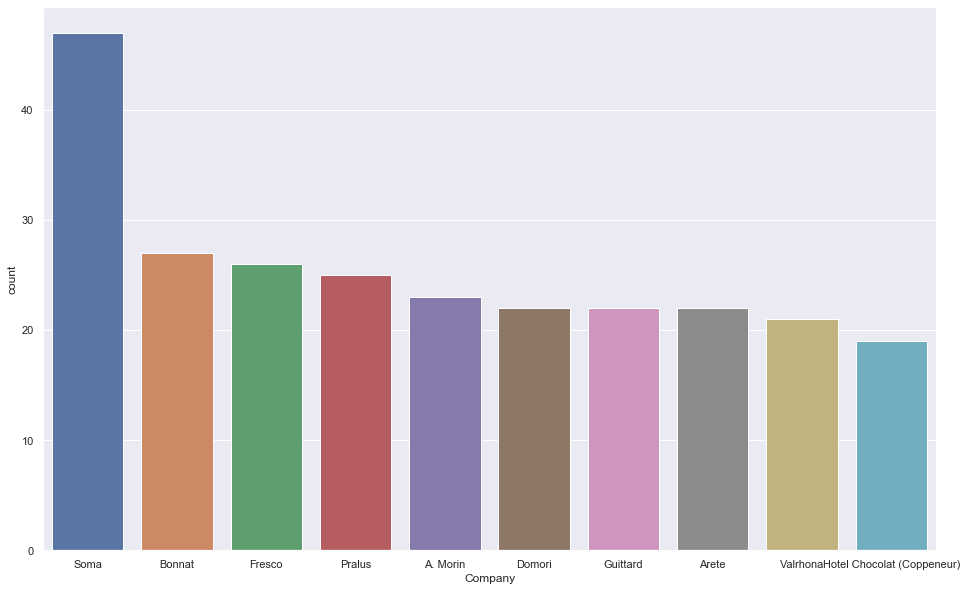

In [353]:
# top 10 chocolate company
plt.figure(figsize=(16,10))
sns.countplot(x='Company',data=df,order=df['Company'].value_counts().iloc[:10].index)

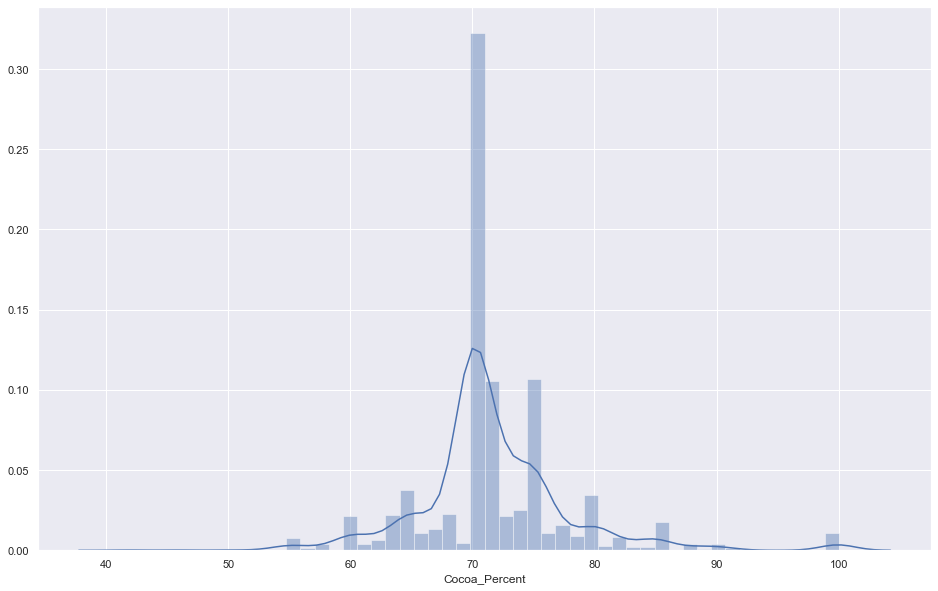

In [355]:
# cocoa percent distribution
plt.figure(figsize=(16,10))
sns.distplot(df['Cocoa_Percent'])

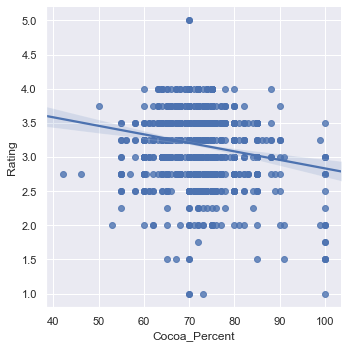

In [362]:
# bar rating with cocoa percentage
# rating goes down as cocoa percentage goes up
sns.lmplot(data=df,x='Cocoa_Percent',y='Rating')

In [273]:
# unique bean type and bean origin
pd.DataFrame(df['Bean_Type'].unique())
pd.DataFrame(df['Bean_Origin'].unique()).head()

,0
0,Sao Tome
1,Togo
2,Peru
3,Venezuela
4,Cuba


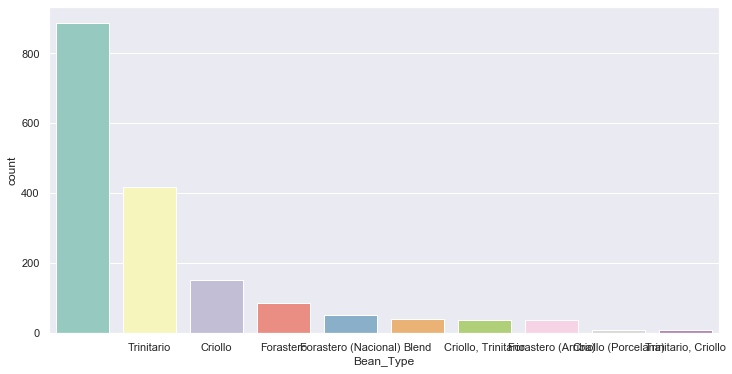

In [345]:
# count plot for bean type and origin
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.countplot(x="Bean_Type", data=df, order=df['Bean_Type'].value_counts().iloc[:10].index, palette='Set3')

In [268]:
bean_count = df.groupby('Bean_Type').count().reset_index().sort
bean_count = bean_count.iloc[:,:2]
bean_count.columns=['Bean_Type','Count']

In [236]:
bean_count_topten = bean_count.sort_values(by=['Count'],ascending=False)[:10]
bean_count_topten

,Bean_Type,Count
40,,888
32,Trinitario,419
7,Criollo,153
19,Forastero,87
25,Forastero (Nacional),52
4,Blend,41
17,"Criollo, Trinitario",39
21,Forastero (Arriba),37
13,Criollo (Porcelana),10
36,"Trinitario, Criollo",9


In [239]:
fig = px.bar(bean_count_topten,
             x='Bean_Type',
             y='Count',
             title='Major Bean Types',
             color='Count',
             barmode='stack')
fig.show()

From the bar chart above, we noticed that the most used bean type is empty. It was left empty instead of null value. Same for the data in empty values in bean origin, we are going to deal with them later using k nearest neighbor.

Other than the empty values, we can see the most used bean type is Trinitario, followed by Criollo, and then Forastero and Forastero(Nacional). Blend is the fifth in the chart. We are curious about if blended beans are better or not.

In [265]:
#origin_count = df.groupby('Bean_Origin').count().reset_index()
#origin_count = origin_count.iloc[:,:2]
#origin_count.columns=['Bean_Origin','Count']
origin_count_topten = origin_count.sort_values(by=['Count'],ascending=False)[:10]
origin_count_topten

,Bean_Origin,Count
90,Venezuela,214
21,Ecuador,193
55,Peru,165
45,Madagascar,145
20,Dominican Republic,141
99,,74
50,Nicaragua,60
4,Brazil,58
3,Bolivia,57
2,Belize,49


In [264]:
fig = px.bar(origin_count_topten,
             x='Bean_Origin',
             y='Count',
             title='Major Origin',
             color='Count',
             barmode='stack')
fig.show()

Most bean origin countries are in south america except Madagasca

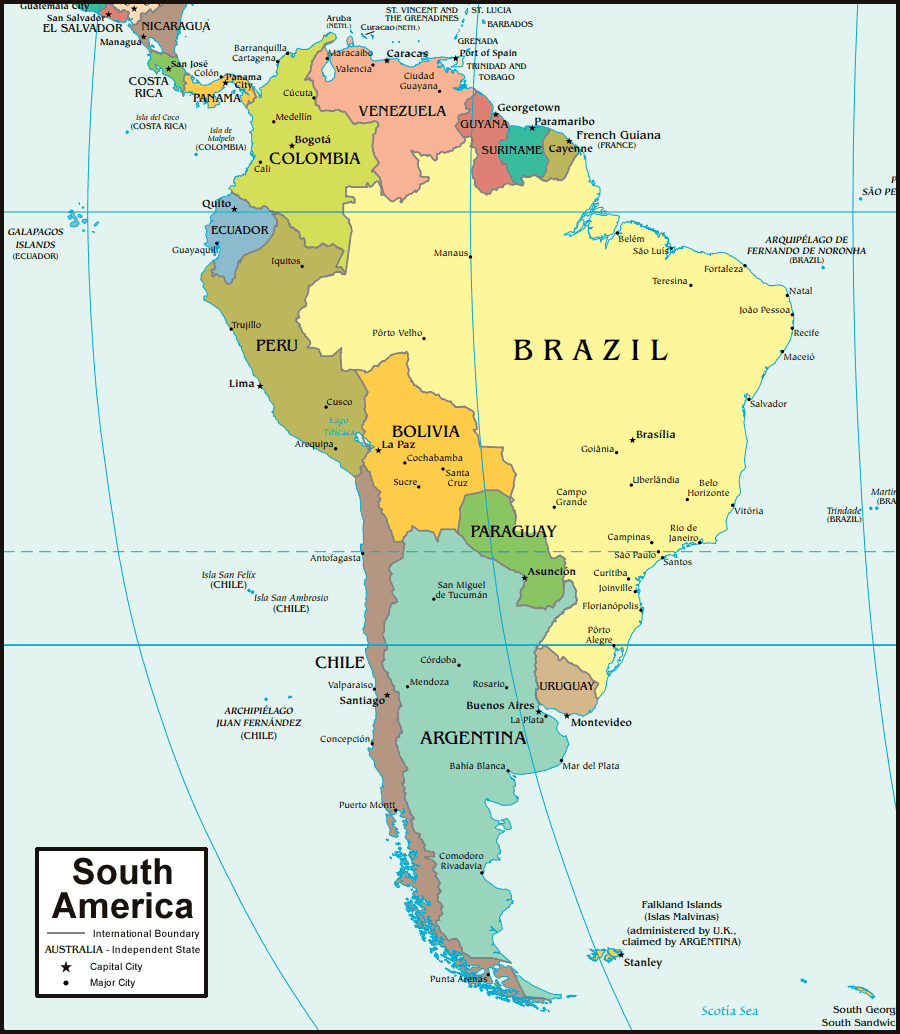

In [263]:
PATH = '/Users/hannahwang/Desktop/Data Science/Regression/image/'
Image(filename = PATH + "map.png", width=900, height=500)

The cacao tree (Theobroma Cacao) is grown in the tropics in a band between 10 to 20 degrees north and south of the equator, sometimes called the "Cocoa Belt". The tree is often grown in the shades of other trees. It can be as tall as 40 feet (12 meters), and has fruits (pods) which are more than on foot (30 cm) long. The fruits may be brownish-yellow to purple, and contain 20-40 seeds or cacao beans in a pink, sweet-sour pulp.

The cacao tree is cultivated in many countries, but today the leading suppliers are Ivory Coast, Ghana, Indonesia, Nigeria, Brazil, Cameroon, Ecuador, Dominican Republic and Papua New Guinea. Other well-known manufacturing countries are Madagascar, Malaysia, Mexico, some Caribbean islands like Grenada and Cuba, and some Pacific islands like Samoa. For more information see the International Cocoa Organization.
Four major types of cacao are cultivated: Criollo, Forastero, Trinitario and Nacional. The Criollo tree originates in Mexico and Central America and gives very high quality cacao beans and is mainly cultivated in South and Central America. The yield is fairly low. A number of varieties of Criollo are cultivated; in Venezuela well-known varieties are "Chuao", "Porcelana", "Puerto Cabello" and "Carupano". Criollo beans are often mixed with other varieties of cacao when making chocolate.

The Forastero is very much cultivated in Africa, but also in Central and South America and constitutes approximately 80% of world production of cacao. This tree grows faster and gives higher yield than other types of cacao. A number of varieties are cultivated, in Venezuela excellent varieties are "Carenero Superior", "Caracas Natural" and "Rio Caribe". The Forastero "Amenolado" variety produces delicate, aromatic beans and is cultivated primarily in Ecuador.

The Trinitario is a crossbreed between the Forastero and Criollo, and is mainly cultivated in Central and South America and Asia. It has its aroma from Criollo and its resistance to disease and its productivity from Forastero.

The Nacional is mostly cultivated in South America west of the Andes. It is prone to disease and difficult to grow, but has an excellent aroma.



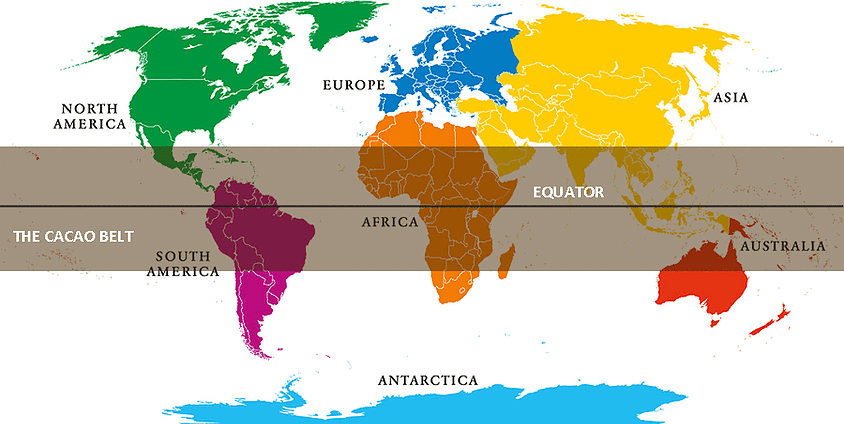

In [285]:
PATH = '/Users/hannahwang/Desktop/Data Science/Regression/image/'
Image(filename = PATH + "cocao_belt.png", width=1000, height=1000)

In [364]:
# average ratings by bean types


In [692]:
# correlation heatmap
#df.corr()
le = LabelEncoder()
Bean_Type_Code=le.fit(list(df['Bean_Type']))
#LabelEncoder.inverse_transform(Bean_Type_Code)

TypeError: inverse_transform() missing 1 required positional argument: 'y'

## KNN fillna

In [706]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [707]:
# predict origin country first because there's only 74 missing values
# before performing knn, we will clean the data a bit more
process_df = df
process_df.head()

,Company,Bar_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [708]:
df.head()

,Company,Bar_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [709]:
# by observing the bean type data, we noticed some adundent categories
# here's some of the changes I did
# combine Criollo, Trinitario with Trinitario, Criollo
process_df['Bean_Type'] = process_df['Bean_Type'].replace('Trinitario, Criollo', 'Criollo, Trinitario')

# TCGA is a cocoa growing association, we can replace Trinitario, TCGA with Trinitario
process_df['Bean_Type'] = process_df['Bean_Type'].replace('Trinitario, TCGA', 'Trinitario')

# since we don't have many amazon beans, we will combine Amazon mix, Amazon ICS, and Amazon
process_df['Bean_Type'] = process_df['Bean_Type'].replace('Amazon mix', 'Amazon')
process_df['Bean_Type'] = process_df['Bean_Type'].replace('Amazon, ICS', 'Amazon')

# we will replace Criollo +, Criollo (Wild), Criollo (Ocumare), Criollo (Ocumare 77), Criollo (Ocumare 67), 
# Criollo (Ocumare 61), Criollo (Amarru) with Criollo

process_df['Bean_Type'] = process_df['Bean_Type'].replace('Criollo (Ocumare 61)', 'Criollo (Ocumare)')
process_df['Bean_Type'] = process_df['Bean_Type'].replace('Criollo (Amarru)', 'Criollo')
process_df['Bean_Type'] = process_df['Bean_Type'].replace('Criollo (Wild)', 'Criollo')
process_df['Bean_Type'] = process_df['Bean_Type'].replace('Criollo, +', 'Criollo')
process_df['Bean_Type'] = process_df['Bean_Type'].replace('Criollo (Ocumare 67)', 'Criollo (Ocumare)')
process_df['Bean_Type'] = process_df['Bean_Type'].replace('Criollo (Ocumare 77)', 'Criollo (Ocumare)')


# replace Blend-Forastero,Criollo with Forastero,Criollo
process_df['Bean_Type'] = process_df['Bean_Type'].replace('Blend-Forastero,Criollo', 'Criollo, Forastero')


# replace Trinitario (85% Criollo) with Trinitario Criollo
new_bean_count = process_df.groupby('Bean_Type').count().reset_index().iloc[:,:2]
new_bean_count.columns=['Bean_Type','Count']
new_bean_count.sort_values(by=['Count'],ascending=False)

,Bean_Type,Count
29,,888
23,Trinitario,420
4,Criollo,157
10,Forastero,87
16,Forastero (Nacional),52
8,"Criollo, Trinitario",48
2,Blend,41
12,Forastero (Arriba),37
6,Criollo (Porcelana),10
17,Forastero (Parazinho),8


In [710]:
# by observing the bean type data, we noticed some adundent categories
# here's some of the changes I did
# combine Criollo, Trinitario with Trinitario, Criollo

process_df['Bean_Origin'] = process_df['Bean_Origin'].replace('Carribean(DR/Jam/Tri)', 'Carribean')
process_df['Bean_Origin'] = process_df['Bean_Origin'].replace('Trinidad-Tobago', 'Trinidad, Tobago')
process_df['Bean_Origin'] = process_df['Bean_Origin'].replace("Peru, Mad., Dom. Rep.", "Peru, Madagascar, Dominican Republic")
process_df['Bean_Origin'] = process_df['Bean_Origin'].replace("Central and S. America", "Central and South America")
process_df['Bean_Origin'] = process_df['Bean_Origin'].replace("PNG, Vanuatu, Mad", "Papua New Guinea, Vanuatu, Madagascar")
process_df['Bean_Origin'] = process_df['Bean_Origin'].replace("Ven., Trinidad, Mad.", "Venezuela, Trinidad, Madagascar")
process_df['Bean_Origin'] = process_df['Bean_Origin'].replace("Ven.,Ecu.,Peru,Nic.", "Venezuela, Ecuador, Peru, Nicaragua")
process_df['Bean_Origin'] = process_df['Bean_Origin'].replace("Ven, Trinidad, Ecuador","Venezuela, Trinidad, Ecuador")
process_df['Bean_Origin'] = process_df['Bean_Origin'].replace("Ghana, Domin. Rep", "Ghana, Dominican Republic")
process_df['Bean_Origin'] = process_df['Bean_Origin'].replace("Ecuador, Mad., PNG","Ecuador, Madagascar, Papua New Guinea")
process_df['Bean_Origin'] = process_df['Bean_Origin'].replace("Mad., Java, PNG","Madagascar, Java, Papua New Guinea")
process_df['Bean_Origin'] = process_df['Bean_Origin'].replace("Gre., PNG, Haw., Haiti, Mad", "Grenada, Papua New Guinea, Hawaii, Haiti, Madagascar")
#process_df.head()
new_origin_count = process_df.groupby('Bean_Origin').count().reset_index().iloc[:,:2]
new_origin_count.columns=['Bean_Origin','Count']
new_origin_count.sort_values(by=['Count'],ascending=False)
new_origin_count.head()

,Bean_Origin,Count
0,"Africa, Carribean, C. Am.",1
1,Australia,3
2,Belize,49
3,Bolivia,57
4,Brazil,58


In [711]:
# replacing empty values with null
process_df = process_df.replace('\xa0', np.nan)
process_df.isnull().sum()

Company               0
Bar_Origin            0
REF                   0
Review_Date           0
Cocoa_Percent         0
Company_Location      0
Rating                0
Bean_Type           888
Bean_Origin          74
dtype: int64

In [712]:
# Changing the type for review_date from int to object
process_df['Review_Date'] = process_df['Review_Date'].astype(str)
process_df['Rating'] = process_df['Rating'].astype(str)
process_df['Company'] = process_df['Company'].astype(str)
process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company             1795 non-null object
Bar_Origin          1795 non-null object
REF                 1795 non-null int64
Review_Date         1795 non-null object
Cocoa_Percent       1795 non-null float64
Company_Location    1795 non-null object
Rating              1795 non-null object
Bean_Type           907 non-null object
Bean_Origin         1721 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 126.3+ KB


In [713]:
from sklearn.preprocessing import StandardScaler

In [714]:
# normalizing data
scaler = StandardScaler()
data = process_df.select_dtypes(exclude=['object'])

process_df[data.columns] = scaler.fit(data).transform(data)
#scaler.transform(data)

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [715]:
process_df.head()

,Company,Bar_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin
0,A. Morin,Agua Grande,1.519895,2016,-1.376022,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1.158056,2015,-0.268665,France,2.75,NaN,Togo
2,A. Morin,Atsane,1.158056,2015,-0.268665,France,3.0,NaN,Togo
3,A. Morin,Akata,1.165293,2015,-0.268665,France,3.5,NaN,Togo
4,A. Morin,Quilla,1.208714,2015,-0.268665,France,3.5,NaN,Peru


### Predict bean origin

In [716]:
# use knn to predict missing values in bean origin first
# split data
predict_df = process_df.drop(['Bean_Type'],axis=1)
predict_df.head()

,Company,Bar_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Origin
0,A. Morin,Agua Grande,1.519895,2016,-1.376022,France,3.75,Sao Tome
1,A. Morin,Kpime,1.158056,2015,-0.268665,France,2.75,Togo
2,A. Morin,Atsane,1.158056,2015,-0.268665,France,3.0,Togo
3,A. Morin,Akata,1.165293,2015,-0.268665,France,3.5,Togo
4,A. Morin,Quilla,1.208714,2015,-0.268665,France,3.5,Peru


In [717]:
# splitting null and not null bean origin
train_data_origin = predict_df[predict_df['Bean_Origin'].notnull()]
test_data_origin = predict_df[predict_df['Bean_Origin'].isnull()]
test_data_origin.head()

,Company,Bar_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Origin
77,Amedei,Nine,-1.673332,2007,0.522304,Italy,4.0,NaN
85,Amedei,Toscano Black,-1.566590,2007,-1.376022,Italy,3.5,NaN
86,Amedei,Toscano Black,-1.801785,2006,-0.268665,Italy,5.0,NaN
87,Amedei,Toscano Black,-1.738463,2006,-0.901441,Italy,4.0,NaN
144,Bahen & Co.,Houseblend,0.792599,2015,1.313274,Australia,3.25,NaN


In [757]:
# label encoding train dataset
#df = df.apply(lambda col: le.fit_transform(col))

train_data_origin_t = train_data_origin.apply(lambda col: le.fit_transform(col))
train_data_origin_t['REF'] = train_data_origin['REF']
train_data_origin_t['Cocoa_Percent'] = train_data_origin['Cocoa_Percent']
train_data_origin_t.tail()

,Company,Bar_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Origin
1790,403,712,-0.703604,5,-0.268665,3,10,54
1791,403,244,-0.519066,5,-1.059635,3,7,11
1792,403,457,-0.519066,5,-1.059635,3,9,37
1793,403,457,-0.461172,5,-1.534216,3,8,37
1794,403,131,-0.994884,4,-1.059635,3,7,4


In [781]:
# label encoding test dataset
test_data_origin_t = test_data_origin.apply(lambda col: le.fit_transform(col))
test_data_origin_t['REF'] = test_data_origin['REF']
test_data_origin_t['Cocoa_Percent'] = test_data_origin['Cocoa_Percent']


In [782]:
x_origin = train_data_origin_t.drop(['Bean_Origin'],axis=1)
y_origin = train_data_origin_t['Bean_Origin']
y_origin.head()

0    66
1    76
2    76
3    76
4    54
Name: Bean_Origin, dtype: int64

In [783]:
# train test split
x_train_origin,x_test_origin,y_train_origin,y_test_origin = train_test_split(x_origin,y_origin,test_size= 0.1, train_size=0.9, random_state=42)

In [784]:
# train knn model to replace missing values
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train_origin,y_train_origin)
y_pred = knn.predict(x_test_origin)
y_pred

array([ 3, 19,  2, 43, 85,  9,  9, 85, 19, 54, 85, 43, 20, 81, 85, 13,  4,
       43, 20, 20, 19, 19, 54, 67,  2, 54, 26, 54, 54,  2, 54, 52, 19, 20,
       43, 54, 85, 20, 52, 19, 19, 43, 80, 19, 19, 20, 19, 48, 46,  2, 43,
       20, 74, 17,  4,  2, 43, 38,  9, 20, 33, 43, 85, 20, 19, 85,  4,  3,
       43, 20, 35, 67, 54, 20, 85, 77, 20, 85, 54, 19,  4, 26, 85, 52, 85,
       52, 43,  3, 85, 20, 13,  2, 35, 85, 43, 85, 49,  2, 20, 85, 54, 20,
       20, 43, 19,  2, 43, 17, 43, 20, 19, 20, 19, 43, 20, 19, 43, 43,  2,
       85, 54, 54, 43, 43, 54, 85, 85, 95, 20, 43, 54, 77, 20, 11,  4, 85,
       85, 20,  2,  3, 35, 77, 43, 85, 19, 38, 49, 13, 19, 85, 43, 49, 41,
       13, 20,  2,  2, 43,  9, 13, 38,  4, 54, 13,  2, 19, 43, 48, 95, 43,
       30, 20,  4])

In [785]:
# check score of our model
acc = accuracy_score(y_test_origin,y_pred)
precision = precision_score(y_test_origin,y_pred,average='micro')
recall = recall_score(y_test_origin,y_pred,average='micro')
f1 = f1_score(y_test_origin,y_pred,average='micro')
recall

0.3872832369942196

In [786]:
# predict bean origin
x_test_pred = test_data_origin_t.drop(['Bean_Origin'],axis=1)
y_test_pred = knn.predict(x_test_pred)

test_data_origin_t['Bean_Origin'] = y_test_pred
#test_data_origin_t
data_origin_pred = pd.concat([train_data_origin_t,test_data_origin_t])

### Predict bean type

In [787]:
process_df.head()

,Company,Bar_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin
0,A. Morin,Agua Grande,1.519895,2016,-1.376022,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1.158056,2015,-0.268665,France,2.75,NaN,Togo
2,A. Morin,Atsane,1.158056,2015,-0.268665,France,3.0,NaN,Togo
3,A. Morin,Akata,1.165293,2015,-0.268665,France,3.5,NaN,Togo
4,A. Morin,Quilla,1.208714,2015,-0.268665,France,3.5,NaN,Peru


In [788]:
# we drop bean origin data first because missing values
predict_df = process_df.drop(['Bean_Origin'],axis=1)
predict_df.head()

,Company,Bar_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type
0,A. Morin,Agua Grande,1.519895,2016,-1.376022,France,3.75,NaN
1,A. Morin,Kpime,1.158056,2015,-0.268665,France,2.75,NaN
2,A. Morin,Atsane,1.158056,2015,-0.268665,France,3.0,NaN
3,A. Morin,Akata,1.165293,2015,-0.268665,France,3.5,NaN
4,A. Morin,Quilla,1.208714,2015,-0.268665,France,3.5,NaN


In [789]:
# splitting null and not null dataset
know_df = predict_df[predict_df['Bean_Type'].notnull()]
pred_df = predict_df[predict_df['Bean_Type'].isnull()]

In [790]:
# label encoding train set
know_df_le = know_df.apply(lambda col: le.fit_transform(col))
know_df_le['Review_Date'] = know_df['Review_Date']
know_df_le['Cocoa_Percent'] = know_df['Cocoa_Percent']
know_df_le.head()

,Company,Bar_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type
5,0,94,245,2014,-0.268665,16,6,4
7,0,482,245,2014,-0.268665,16,9,4
8,0,412,246,2014,-0.268665,16,10,4
11,0,281,177,2013,-0.268665,16,7,4
17,0,111,178,2013,-0.268665,16,11,23


In [791]:
# label encoding test set
pred_df_le = pred_df.apply(lambda col: le.fit_transform(col))
pred_df_le['Review_Date'] = pred_df['Review_Date']
pred_df_le['Cocoa_Percent'] = pred_df['Cocoa_Percent']
pred_df_le.head()

,Company,Bar_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type
0,0,9,358,2016,-1.376022,12,10,0
1,0,272,312,2015,-0.268665,12,6,0
2,0,39,312,2015,-0.268665,12,7,0
3,0,10,313,2015,-0.268665,12,9,0
4,0,444,319,2015,-0.268665,12,9,0


In [792]:
# split train test set

x_know_df = know_df_le.drop(['Bean_Type'],axis=1)
y_know_df = know_df_le['Bean_Type']

x_train_know,x_test_know,y_train_know,y_test_know = train_test_split(x_know_df,y_know_df,test_size=.1,random_state=42)

In [793]:
# train knn model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_know,y_train_know)
y_pred_know = knn.predict(x_test_know)


In [794]:
# scores
acc = accuracy_score(y_test_know,y_pred_know)
precision = precision_score(y_test_know,y_pred_know, average='micro')
recall = recall_score(y_test_know,y_pred_know, average='micro')
f1 = f1_score(y_test_know,y_pred_know,average='micro')
f1

0.5384615384615384

In [795]:
# predict missing values
x_pred_df = pred_df_le.drop('Bean_Type',axis=1)
pred_bean_type = knn.predict(x_pred_df)
pred_df_le['Bean_Type'] = pred_bean_type
data_bean_pred = pd.concat([know_df_le,pred_df_le])
data_origin_pred['Bean_Type'] = data_bean_pred['Bean_Type']
data_pred = data_origin_pred

In [833]:
data_pred['Rating']=df['Rating']

### correlation

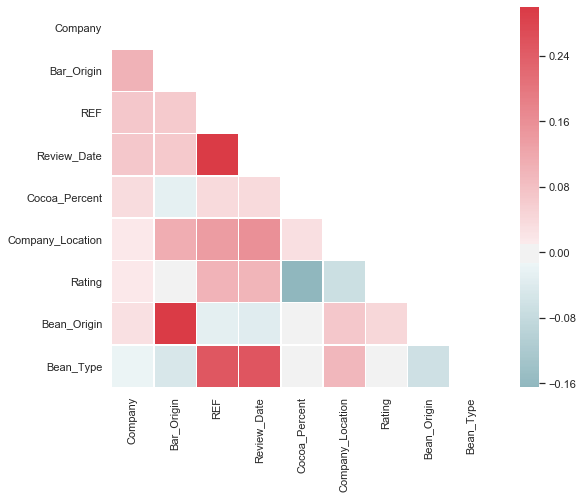

In [834]:
sns.set(style='white')
plt.figure(figsize=(10,7))
cmap = sns.diverging_palette(210, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

corr = data_pred[['Company', 'Bar_Origin', 'REF', 'Review_Date', 'Cocoa_Percent',
       'Company_Location', 'Rating', 'Bean_Origin', 'Bean_Type']].corr()
sns.heatmap(corr, mask=mask,cmap=cmap, center=0,
            square=True, vmax=.3, linewidths=.5)

## Feature Selection

In [843]:
from sklearn.tree import DecisionTreeClassifier

In [844]:
X = data_pred.drop('Rating',axis=1).values
y = data_pred['Rating'].astype(int)

In [1000]:
# run decision tree estimators
dt = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=10)
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

### Q1

In [853]:
# get feature importance for each feature
fi_name =[]
fi =[]
for i, column in enumerate(data_pred.drop('Rating',axis=1)):
    fi_name.append(column)
    fi.append(dt.feature_importances_[i])
fi_df = zip(fi_name,fi)    
fi_df = pd.DataFrame(fi_df,columns=['Feature','Feature Importance'])

In [999]:
fi_df = fi_df.sort_values('Feature Importance',ascending=False)
fi_df
# remove review date

,Feature,Feature Importance
2,REF,0.240704
0,Company,0.185722
1,Bar_Origin,0.170952
4,Cocoa_Percent,0.152407
5,Company_Location,0.118871
6,Bean_Origin,0.084411
7,Bean_Type,0.031868
3,Review_Date,0.015066


REF is the most important followed by Company, Bar origin, cocoa percent, and company location

## Data Partitioning

In [857]:
data_final = data_pred.drop('Review_Date',axis=1)

In [860]:
X = data_final.drop('Rating',axis=1).values
y = data_final['Rating'].astype(int)

In [861]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Random Forest

In [929]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [934]:
rf = RandomForestClassifier()
# Parameter for performing hyper tuning
parameters = {'n_estimators': [3,4, 5, 6], 'max_depth': [2, 3, 4,5,6], \
              'min_samples_split': [25, 30, 35], 'max_leaf_nodes': [4, 5, 6]}

clf = GridSearchCV(random_forest, parameters,  cv = 5)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning:

The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.



{'max_depth': 5, 'max_leaf_nodes': 5, 'min_samples_split': 35, 'n_estimators': 5}
0.7047353760445683


In [936]:
pred=clf.predict(X_train)
precision_score(y_train, pred, average='micro')

0.7054317548746518

In [937]:
t_pred = clf.predict(X_test)
precision_score(y_test, t_pred, average='micro')

0.6685236768802229

## Naive Bayes

In [954]:
from sklearn.naive_bayes import GaussianNB

In [955]:
lm = GaussianNB()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_train)

In [959]:
lm.score(X_train,y_train)

0.697075208913649

In [960]:
lm.score(X_test,y_test)

0.6657381615598886

In [972]:
category = data_final
category['Rating'] = category['Rating'].astype(float)

# Function to convert the values for the  rating to its nearest whole number
def round_rating(rating):
    if (rating < 1 ):
        return 0
    elif (rating > 0 ) and (rating < 2 ):
        return 1
    elif (rating >= 2 ) and (rating < 3 ):
        return 2
    elif (rating >= 3 ) and (rating < 4 ):
        return 3
    elif (rating >= 4 ) and (rating < 5 ):
        return 4
    else:
        return 5


In [980]:
category['Rating'] = category['Rating'].apply(round_rating)
print(category['Rating'].unique())


[3 2 4 5 1]


In [990]:
X2 = category.drop('Rating',axis=1).values
y2 = category['Rating'].values

In [991]:
# resplit data
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.2, random_state=42)

In [996]:
clf = GridSearchCV(random_forest, parameters,  cv = 5)
clf.fit(X_train2, y_train2)


print(clf.best_params_)
print(clf.best_score_)

/Users/hannahwang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning:

The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.



{'max_depth': 5, 'max_leaf_nodes': 6, 'min_samples_split': 35, 'n_estimators': 6}
0.7040389972144847


In [997]:
#Predict the response for test dataset
y_pred2 = clf.predict(X_test2)

# Getting the accuracy metric
acc = accuracy_score(y_pred2, y_test2)

In [995]:
acc

0.6713091922005571